In [3]:
import xbbg
from xbbg import blp
import numpy as np
import pandas as pd
import datetime as DT
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
pd.options.display.float_format = '{:,.2f}'.format

c:\users\boris\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
c:\users\boris\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1

In [4]:
today = DT.date.today()
startdate = '1/1/2003'
enddate = today
writer = pd.ExcelWriter('mpca.xlsx')

In [5]:
def get_dict_inv(d):
    return {v: k for k, v in d.items()}

def standardize_data(df):
    return (df-df.mean())/df.std()

In [15]:
all_t={ 
    "E1" : "GSPUESGS Index", 
    "E2" : "GSPUMFVA Index", 
    "E3" : "GSPUMFSI Index", 
    "E4" : "GSPUMFVO Index",
    "E5" : "GSPUMFMO Index",
    "E6" : "GSPUMFGR Index",
    "E7" : "GSPEESGS Index",
    "E8" : "GSPEMFMO Index",
    "E9" : "GSPEMFGR Index",
    "E10" : "GSPEMFVO Index",
    "E11" : "GSPEMOMO Index",
    "E12" : "GSPEMFVA Index",
    "E13" : "GSPEMFSI Index",
    "E14" : "GSRPEMJP Index",
    "E15" : "GSRPEWJP Index",
    "E16" : "GSRPEVJP Index",
    "E17" : "GSRPEQJP Index",
    "E18" : "GSRPESJP Index",
    "E19" : "GSXUESGL Index",
    "E20" : "GSXUESGS Index",
    "E21" : "GSXEESGL Index",
    "E22" : "GSXEESGS Index",
    "E23" : "GSXUMFML Index",
    "E24" : "GSXUMFMS Index",
    "E25" : "GSXUMFWL Index",
    "E26" : "GSXUMFWS Index",
    "E27" : "GSXELMOM Index",
    "E28" : "GSXEHMOM Index",
    "E29" : "GSXUMFVS Index",
    "E30" : "GSXUMFVL Index",
    "E31" : "GSXUMFGL Index",
    "E32" : "GSXUMFGS Index",
    "E33" : "GSXUMFSL Index",
    "E34" : "GSXUMFSS Index",
    "E35" : "GSXEMFML Index",
    "E36" : "GSXEMFMS Index",
    "E37" : "GSXEMFWL Index",
    "E38" : "GSXEMFWS Index",
    "E39" : "GSXEMFVL Index",
    "E40" : "GSXEMFVS Index",
    "E41" : "GSXEMFGL Index",
    "E42" : "GSXFBZML Index",
    "E43" : "GSXFBZMS Index",
    "E44" : "GSXFBZGL Index",
    "E45" : "GSXFBZGS Index",
    "E46" : "GSXFBZVL Index",
    "E47" : "GSXFBZVS Index",
    "E48" : "GSXEMFGS Index",
    "E49" : "GSXEMFSL Index",
    "E50" : "GSXEMFSS Index",
    "E51" : "GSRPEMJL Index",
    "E52" : "GSRPEMJS Index",
    "E53" : "GSRPEWJL Index",
    "E54" : "GSRPEWJS Index",
    "E55" : "GSRPEVJL Index",
    "E56" : "GSRPEVJS Index",
    "E57" : "GSRPEQJL Index",
    "E58" : "GSRPEQJS Index",
    "E59" : "GSRPESJL Index",
    "E60" : "GSRPESJS Index",
    "E61" : "GSXUSGRO Index",
    "E62" : "GSCBMSAL Index",
    "E63" : "GSXUNPTC Index",
    "E64" : "GSCMREOP Index",
    "E65" : "GSXUSHGM Index",
    "E66" : "GSCBHMOM Index",
    "E67" : "GSXUESGF Index",
    "E68" : "GSCBOPQA Index",
    "E69" : "GSTHHVIP Index",
    "E70" : "GSXURATE Index",
    "E71" : "GSXURNEW Index",
    "E72" : "GSXURFAV Index",
    "E73" : "GSCM1XCB Index",
    "E74" : "GSXUODOM Index",
    "E75" : "FTSEMIB Index",
    "E76" : "GSCBBTC1 Index",
    "E77" : "GSXUPAND Index",
    "E78" : "GSTHVISP Index",
    "E79" : "GSXUGPMI Index",
    "E80" : "GSXUBOND Index",
    "E81" : "GSXUSTAY Index",
    "E82" : "GSXUSPMI Index",
    "E83" : "GSSBCYCL Index",
    "E84" : "GSXUREFL Index",
    "E85" : "GSCMSPY5 Index",
    "E86" : "GSXULVGM Index",
    "E87" : "GSXUHODP Index",
    "E88" : "GSCBLMOM Index",
    "E89" : "GSXUSMBB Index",
    "E90" : "GSXULIPO Index",
    "E91" : "GSXULODP Index",
    "E92" : "GSCBCHSE Index",
    "E93" : "GSXUHYGE Index",
    "E94" : "GSTHREPO Index",
    "E95" : "GSXUOINT Index",
    "E96" : "GSXUINFS Index",
    "E97" : "GSPRUCIT Index",
    "E98" : "GSPUDEMP Index",
    "E99" : "GSPUINFS Index",
    "E100" : "GSPRGDPT Index",
    "E101" : "GSPRLEVR Index",
    "E102" : "GSPRMUTL Index",
    "E103" : "GSPUDFLT Index",
    "E104" : "GSPURATE Index",
    "E105" : "GSPRHVMS Index",
    "E106" : "GSPUVLSG Index",
    "E107" : "GSPRGMPT Index",
    "E108" : "AS51 Index",
    "E109" : "GSPRSTAY Index",
    "E110" : "GSPUSCGC Index",
    "E111" : "GSPRHLIC Index",
    "E112" : "GSTHVIPP Index",
    "E113" : "GSPUTAXP Index",
    "E114" : "GSPUSGBO Index",
    "E115" : "GSPUDOIN Index",
    "E116" : "IBOV Index",
    "E117" : "MXEF Index",
    "E118" : "MEXBOL Index",
    "E119" : "VG1 Index",
    "E120" : "GSPRHIMO Index",
    "E121" : "GSPUMFGV Index",
    "E122" : "SHCOMP Index",
    "E123" : "M1EE Index",
    "E124" : "NDEUSSA Index",
    "E125" : "NDEUSRU Index",
    "E126" : "M1SAP Index",
    "E127" : "MGCUQAN Index",
    "E128" : "NDEUSPO Index",
    "E129" : "MGCUAEN Index",
    "E130" : "MGCUKWN Index",
    "E131" : "NDEUTUR Index",
    "E132" : "NDEUSHG Index",
    "E133" : "NDDUGRE Index",
    "E134" : "NDEUSCZ Index",
    "E135" : "NDEUSEG Index",
    "E136" : "M1EF Index",
    "E137" : "GDUETCF Index",
    "E138" : "GDUESKO Index",
    "E139" : "GDUESTW Index",
    "E140" : "GDUESIA Index",
    "E141" : "GDUEBRAF Index",
    "E142" : "GDUESSA Index",
    "E143" : "GDUESRUS Index",
    "E144" : "M2SAP Index",
    "E145" : "GDUESTHF Index",
    "E146" : "GDUETMXF Index",
    "E147" : "GDDUMAF Index",
    "E148" : "GDUESINF Index",
    "E149" : "GDUESPHF Index",
    "E150" : "MGCUQAG Index",
    "E151" : "GDUESPO Index",
    "E152" : "MGCUAEG Index",
    "E153" : "GDUESCH Index",
    "E154" : "MGCUKWG Index",
    "E155" : "GDUESTK Index",
    "E156" : "GDUESPR Index",
    "E157" : "GDUESHG Index",
    "E158" : "GDUESCO Index",
    "E159" : "GDUESAG Index",
    "E160" : "GDUESCZ Index",
    "E161" : "GDUESGE Index",
    "E162" : "GDUESEG Index",
    "E163" : "GDUESPF Index",
    "E164" : "GSEMCAEN Index",
    "E165" : "ES1 Index",
    "E166" : "GSEMCAMA Index",
    "E167" : "GSEMCACO Index",
    "E168" : "CAC Index",
    "E169" : "GSEMMERE Index",
    "E170" : "GSEMMECO Index",
    "E171" : "GSEMCEEN Index",
    "E172" : "NK1 Index",
    "E173" : "GSEMCEMA Index",
    "E174" : "GSEMCECO Index",
    "E175" : "GSEMCEUT Index",
    "E176" : "GX1 Index",
    "E177" : "GSECPOBK Index",
    "E178" : "WIGBANK Index",
    "E179" : "NQ1 Index",
    "E180" : "GSECCEBK Index",
    "E181" : "GSCBSAFI Index",
    "E182" : "GSEMCAFI Index",
    "E183" : "GSEMCEFI Index",
    "E184" : "GSEMMEFI Index",
    "E185" : "GSECGKBK Index",
    "E186" : "HC1 Index", 
    "E187" : "JBNKS Index",
    "E188" : "SBER RX Equity",
    "E189" : "GSECRSTL Index",
    "E190" : "GSECROIL Index",
    "E191" : "GSRUSUTI Index",
    "E192" : "GSECRUEN Index",
    "E193" : "GSCBRHYC Index",
    "E194" : "GSECSAMI Index",
    "E195" : "GSSSAMAT Index",
    "E196" : "GSECSAGD Index",
    "E197" : "GSECSABK Index",
    "E198" : "GSSADOMZ Index",
    "E199" : "GSTURBNK Index",
    "E200" : "GSTURIND Index",
    "E201" : "GSTURMAT Index",
    "E202" : "GSECSACH Index",
    "E203" : "GSECSAIF Index",
    "E204" : "GSECSRMS Index",
    "E205" : "GSEMSRFI Index",
    "E206" : "GSCMARMC Index",
    "E207" : "MXEF0FN Index",
    "E208" : "MXEF0TC Index",
    "E209" : "MXEF0EN Index",
    "E210" : "MXEF0MT Index",
    "E211" : "MXEF0IT Index",
    "E212" : "MXEF0CS Index",
    "E213" : "MXEF0CD Index",
    "E214" : "MXEF0HC Index",
    "E215" : "MXEF0IN Index",
    "E216" : "MXEF0RE Index",
    "E217" : "MXEF0UT Index",
    "E218" : "MXEE0FN Index",
    "E219" : "MXEE0TC Index",
    "E220" : "MXEE0EG Index",
    "E221" : "MXEE0ML Index",
    "E222" : "MXEE0CS Index",
    "E223" : "MXEE0HC Index",
    "E224" : "MXEE0RE Index",

}



all_t_inv= {v: k for k, v in all_t.items()}

df= blp.bdh(all_t.values(),'PX_LAST', startdate, enddate) #CDR="5D", Fill="P", Days="A")
df.columns = df.columns.get_level_values(0)
df.rename(columns=lambda x:all_t_inv[x], inplace=True)
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)
df.tail()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E215,E216,E217,E218,E219,E220,E221,E222,E223,E224
2022-05-30,104.56,110.50,115.73,120.44,153.20,118.32,103.64,119.96,124.14,88.41,...,173.90,69.43,226.35,221.73,90.95,194.29,236.60,306.13,828.47,71.34
2022-05-31,105.05,111.55,116.55,119.27,153.30,117.21,103.61,119.68,123.24,88.37,...,175.38,70.84,226.78,222.51,91.60,196.08,233.56,305.10,832.86,72.30
2022-06-01,104.54,111.86,116.18,119.65,154.96,116.66,103.37,120.62,122.51,87.66,...,175.50,70.78,224.94,219.34,90.21,193.19,229.13,303.02,819.96,72.06
2022-06-02,104.49,110.36,115.72,120.44,153.50,117.64,103.38,120.35,123.59,88.02,...,174.88,70.09,225.79,217.10,89.90,191.49,231.80,302.81,809.70,72.12
2022-06-03,104.63,110.40,114.60,121.31,156.08,116.33,103.73,121.18,123.41,87.50,...,174.82,70.11,224.27,217.49,89.48,192.20,228.60,304.38,815.39,72.14


In [16]:
TIME = df.index
print(TIME)

Index([2003-01-01, 2003-01-02, 2003-01-03, 2003-01-04, 2003-01-05, 2003-01-06,
       2003-01-07, 2003-01-08, 2003-01-09, 2003-01-10,
       ...
       2022-05-24, 2022-05-25, 2022-05-26, 2022-05-27, 2022-05-29, 2022-05-30,
       2022-05-31, 2022-06-01, 2022-06-02, 2022-06-03],
      dtype='object', length=6139)


In [17]:
df_normalized=(df - df.mean()) / df.std()
pca = PCA(n_components=df.shape[1])
pca.fit(df_normalized)
PCS = pca.fit_transform(df_normalized)

In [18]:
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
index=df.columns)
print(loadings)


       PC0   PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  ...  PC214  \
E1    0.08  0.04 -0.01  0.07  0.04 -0.04  0.02  0.07  0.03 -0.07  ...  -0.01   
E2   -0.08 -0.01 -0.05 -0.03 -0.07 -0.01  0.05 -0.02 -0.01 -0.01  ...   0.01   
E3    0.06  0.09 -0.02  0.04  0.10 -0.05  0.04  0.05 -0.08 -0.06  ...  -0.02   
E4   -0.06 -0.00 -0.09  0.09 -0.09 -0.15 -0.10  0.04 -0.01 -0.03  ...   0.01   
E5    0.09  0.02  0.04 -0.02  0.01 -0.01  0.09  0.04  0.01  0.02  ...  -0.00   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
E220 -0.02  0.02 -0.10  0.08 -0.00  0.24 -0.18  0.00 -0.18  0.10  ...  -0.00   
E221 -0.04  0.02 -0.14  0.10 -0.10  0.00 -0.06  0.03 -0.02 -0.09  ...  -0.00   
E222  0.01 -0.16  0.02  0.00 -0.09 -0.02 -0.09  0.10  0.07  0.06  ...  -0.01   
E223  0.03 -0.14  0.05 -0.06 -0.12 -0.07 -0.04  0.03 -0.03 -0.01  ...   0.00   
E224 -0.08 -0.03 -0.05 -0.02 -0.09 -0.02 -0.00 -0.01 -0.01 -0.02  ...  -0.00   

      PC215  PC216  PC217  PC218  PC219

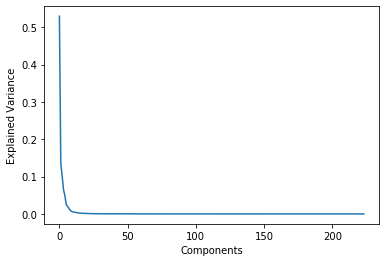

In [19]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()


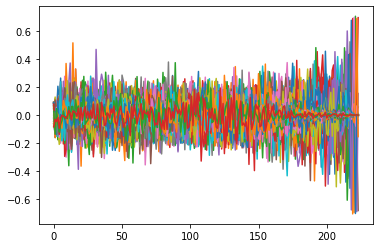

In [20]:
plt.plot(pca.components_)
plt.show()

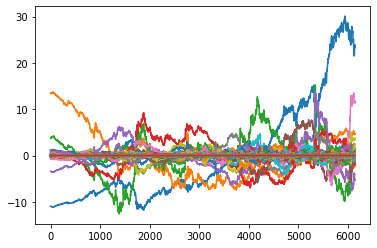

In [21]:
plt.plot(PCS)
plt.show()

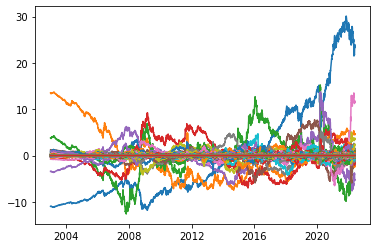

In [26]:
EQT = pd.DataFrame.from_records(data=PCS, columns = ['e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11',
                                                      'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 
                                                      'e22','e23','e24','e25','e26','e27','e28','e29','e30','e31', 'e32','e33',
                                                      'e34','e35','e36','e37','e38','e39','e40','e41','e42','e43','e44','e45',
                                                      'e46','e47','e48','e49','e50','e51','e52','e53','e54','e55','e56','e57',
                                                      'e58','e59','e60', 'e61', 'e62', 'e63', 'e64', 'e65', 'e66', 'e67', 'e68', 'e69', 'e70', 'e71',
                                                      'e72', 'e73', 'e74', 'e75', 'e76', 'e77', 'e78', 'e79', 'e80', 'e81', 
                                                      'e82','e83','e84','e85','e86','e87','e88','e89','e90','e91', 'e92','e93',
                                                      'e94','e95','e96','e97','e98','e99','e100','e101','e102','e103','e104','e105',
                                                      'e106','e107','e108','e109','e110','e111','e112','e113','e114','e115','e116','e117',
                                                      'e118','e119','e120','e121', 'e122', 'e123', 'e124', 'e125', 'e126', 'e127', 'e128', 'e129', 'e130', 'e131',
                                                      'e132', 'e133', 'e134', 'e135', 'e136', 'e137', 'e138', 'e139', 'e140', 'e141', 
                                                      'e142','e143','e144','e145','e146','e147','e148','e149','e150','e151', 'e152','e153',
                                                      'e154','e155','e156','e157','e158','e159','e160','e161','e162','e163','e164','e165',
                                                      'e166','e167','e168','e169','e170','e171','e172','e173','e174','e175','e176','e177',
                                                      'e178','e179','e180','e181', 'e182', 'e183', 'e184', 'e185', 'e186', 'e187', 'e188', 'e189', 'e190', 'e191',
                                                      'e192', 'e193', 'e194', 'e195', 'e196', 'e197', 'e198', 'e199', 'e200', 'e201', 
                                                      'e202','e203','e204','e205','e206','e207','e208','e209','e210','e211', 'e212','e213',
                                                      'e214','e215','e216','e217','e218','e219','e220','e221','e222','e223','e224' ], index=TIME)

plt.plot(EQT)
plt.show()

In [27]:
EQT.head()

,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,...,e215,e216,e217,e218,e219,e220,e221,e222,e223,e224
2003-01-01,-10.97,13.52,3.79,-0.29,-3.43,1.22,-0.80,0.37,0.39,-0.33,...,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00
2003-01-02,-10.97,13.51,3.78,-0.29,-3.42,1.22,-0.80,0.37,0.40,-0.33,...,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00
2003-01-03,-10.95,13.45,3.74,-0.30,-3.41,1.21,-0.80,0.38,0.40,-0.33,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00
2003-01-04,-10.95,13.45,3.74,-0.30,-3.41,1.21,-0.80,0.38,0.40,-0.33,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00
2003-01-05,-10.95,13.45,3.74,-0.30,-3.41,1.21,-0.80,0.38,0.40,-0.33,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00


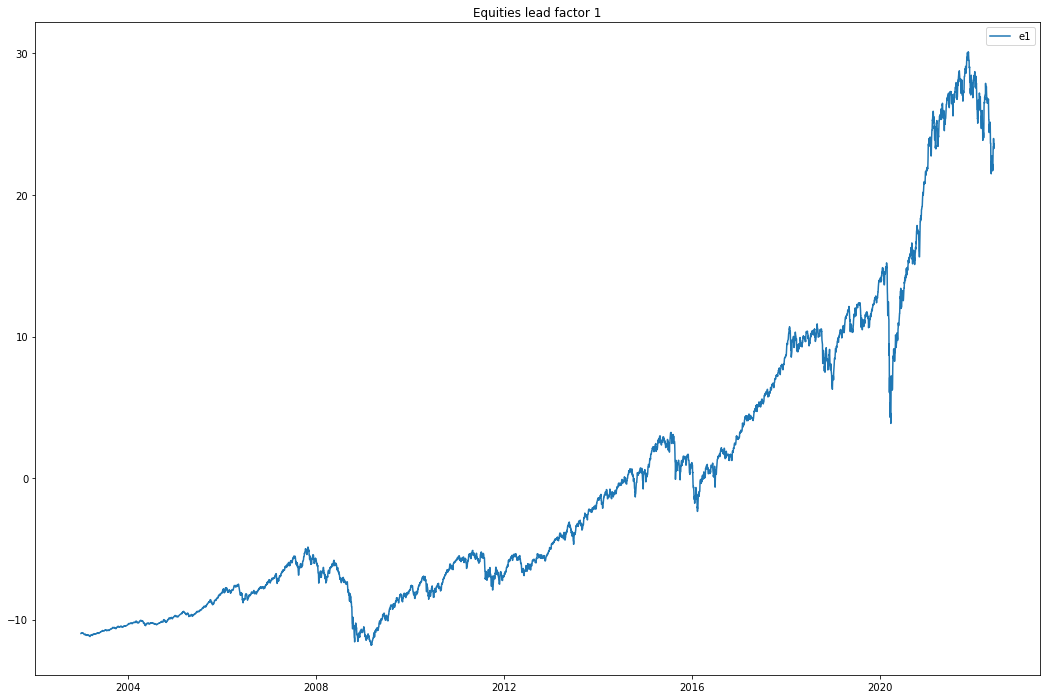

In [28]:
EQT1 = EQT.drop([ 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11',
                                                      'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 
                                                      'e22','e23','e24','e25','e26','e27','e28','e29','e30','e31', 'e32','e33',
                                                      'e34','e35','e36','e37','e38','e39','e40','e41','e42','e43','e44','e45',
                                                      'e46','e47','e48','e49','e50','e51','e52','e53','e54','e55','e56','e57',
                                                      'e58','e59','e60', 'e61', 'e62', 'e63', 'e64', 'e65', 'e66', 'e67', 'e68', 'e69', 'e70', 'e71',
                                                      'e72', 'e73', 'e74', 'e75', 'e76', 'e77', 'e78', 'e79', 'e80', 'e81', 
                                                      'e82','e83','e84','e85','e86','e87','e88','e89','e90','e91', 'e92','e93',
                                                      'e94','e95','e96','e97','e98','e99','e100','e101','e102','e103','e104','e105',
                                                      'e106','e107','e108','e109','e110','e111','e112','e113','e114','e115','e116','e117',
                                                      'e118','e119','e120','e121', 'e122', 'e123', 'e124', 'e125', 'e126', 'e127', 'e128', 'e129', 'e130', 'e131',
                                                      'e132', 'e133', 'e134', 'e135', 'e136', 'e137', 'e138', 'e139', 'e140', 'e141', 
                                                      'e142','e143','e144','e145','e146','e147','e148','e149','e150','e151', 'e152','e153',
                                                      'e154','e155','e156','e157','e158','e159','e160','e161','e162','e163','e164','e165',
                                                      'e166','e167','e168','e169','e170','e171','e172','e173','e174','e175','e176','e177',
                                                      'e178','e179','e180','e181', 'e182', 'e183', 'e184', 'e185', 'e186', 'e187', 'e188', 'e189', 'e190', 'e191',
                                                      'e192', 'e193', 'e194', 'e195', 'e196', 'e197', 'e198', 'e199', 'e200', 'e201', 
                                                      'e202','e203','e204','e205','e206','e207','e208','e209','e210','e211', 'e212','e213',
                                                      'e214','e215','e216','e217','e218','e219','e220','e221','e222','e223','e224'  ], axis=1)
EQT1.plot(figsize=(18,12), title="Equities lead factor 1")
plt.show()

In [29]:
EQT.tail()

,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,...,e215,e216,e217,e218,e219,e220,e221,e222,e223,e224
2022-05-30,23.99,4.74,-0.88,1.04,-5.33,-1.91,11.68,1.43,3.80,-0.72,...,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00
2022-05-31,23.64,4.52,-0.90,1.05,-5.41,-1.27,11.79,1.55,3.57,-1.07,...,-0.01,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00
2022-06-01,23.28,4.50,-0.68,0.96,-5.22,-1.44,11.78,1.46,3.52,-0.95,...,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00
2022-06-02,23.63,4.61,-0.92,1.16,-5.37,-1.60,11.53,1.24,3.46,-0.98,...,0.00,-0.01,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00
2022-06-03,23.38,4.56,-0.74,1.03,-5.22,-1.52,11.67,1.31,3.53,-0.94,...,-0.00,-0.01,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00


In [30]:
EQT1.tail()

,e1
2022-05-30,23.99
2022-05-31,23.64
2022-06-01,23.28
2022-06-02,23.63
2022-06-03,23.38


In [31]:
EQT.to_excel('C:\\B\\MPCA\\EQTPCA.xlsx')